**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 4a | Pandas and Data Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [6,6]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1:  Introduction to Pandas

### 1a. Import and manipulate Bad Drivers dataset with pandas


In this task, we will get familiar with the [pandas](https://pandas.pydata.org) module. The main data type in pandas is called a [DataFrame](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented). Think of `DataFrame` as a direct replacement/substitute for your `Data` class. In fact, starting with Project 4, we will use pandas instead of your `Data` class. As you will soon see, you can easily convert back and forth between pandas DataFrame objects and NumPy ndarrays.

To explore pandas, we will be working with the [Bad Drivers dataset](https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-bad-drivers-dataset). See the description of the Bad Driver dataset csv headers below.
1. Import the dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe called `df` from the url:<br/>https://raw.githubusercontent.com/mwaskom/seaborn-data/master/car_crashes.csv 
2. Using the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation:
    1. Print the shape
    2. To get a list of the column headers and print them.
    3. In one method call get the first 5 items and print the results.
    4. Select the variable `total` and in one line print that column of data (*If not all 51 are displayed under the cell, that is ok*).
3. Print the means of **only** the variables `ins_premium` and `ins_losses`.
4. Create a new DataFrame `df_prnt` which includes only the variables that involve percentages: `speeding`, `alcohol`, `not_distracted`, and `no_previous`.
   1. Update `df_prnt` so that each variable is min-max normalized. This means subtracting the minimum and dividing by the extent so that each variable ranges from 0-1.
   2. Print out the mins and maxs of each variable in `df_prnt`. If everything is working as expected, the mins of each variable should be `0` and the maxs should be `1`.
   3. Print out the means of each column in the `df_prnt` DataFrame.

**Note:** You should not need to use any loops to perform the above steps.

### Bad Drivers dataset headers

header | description
------- | ------------
'total' | Number of drivers involved in fatal collisions per billion miles
'speeding' | Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
'alcohol' | Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
'not_distracted' | Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
'no_previous' | Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
'ins_premium' |  Insurance Premiums ($)
'ins_losses' | Losses incurred by insurance companies for collisions per insured driver ($)
'abbrev' | State


In [2]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/car_crashes.csv"

# 1. Load the data
df = pd.read_csv(url)

# 2. 
# A.
print(f"\nShape: \n{df.shape}")
# B.
print(f"\nColumns: \n{df.columns}")
# C.
print(f"\nFirst 5 items: \n{df.head()}")
# D.
print(f"\nTotal: \n{df['total']}")




Shape: 
(51, 8)

Columns: 
Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

First 5 items: 
   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  

Total: 
0     18.8
1     18.1
2     18.6
3     22.4
4     12.0
5     13.6
6     10.8
7     16.2
8      5.9
9     17.9
10    15.6
11    17.5
12    15.3
13    12.8
14    14.5
15    15.7
16    17.8
17    21.4
18    20.5
19    15.1
20    12

In [3]:
# 3.
print(f"\nMeans of ins_premium and ins_losses: \n{df[['ins_premium', 'ins_losses']].mean()}")
# 4.
df_prnt = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']]
# A.
df_prnt = (df_prnt - df_prnt.min()) / (df_prnt.max() - df_prnt.min())
# B.
print(f"\nMins: \n{df_prnt.min()}")
print(f"\nMaxs: \n{df_prnt.max()}")
# C.
print(f"\nMeans: \n{df_prnt.mean()}")



Means of ins_premium and ins_losses: 
ins_premium    886.957647
ins_losses     134.493137
dtype: float64

Mins: 
speeding          0.0
alcohol           0.0
not_distracted    0.0
no_previous       0.0
dtype: float64

Maxs: 
speeding          1.0
alcohol           1.0
not_distracted    1.0
no_previous       1.0
dtype: float64

Means: 
speeding          0.418673
alcohol           0.390028
not_distracted    0.539390
no_previous       0.526975
dtype: float64


### 1b. Plot insurance premium associated with total number of driver fatalities in each state

1. Using the data in DataFrame `df`, create a scatter plot with the total number of driver fatalities on the x axis and the insurance premium on the y axis.
2. Label the x and y axis appropriately.
3. [Annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) each marker with the state that the sample is associated with.
   1. If you need to, you can use [plt.gca()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html) to get the current axis.
   2. In a loop over the number of samples, call [annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) on the axis to label the marker at $(x_i, y_i)$ with the state associated with sample $i$.
   3. Call `plt.show()` like usual after the loop completes.

(<Figure size 1400x1200 with 2 Axes>,
 <Axes: title={'center': 'Total Driver Fatalities by Insurance Premium'}, xlabel='Fatalities', ylabel='Insurance'>,
 <Axes: xlabel='Fatalities', ylabel='Residuals'>)

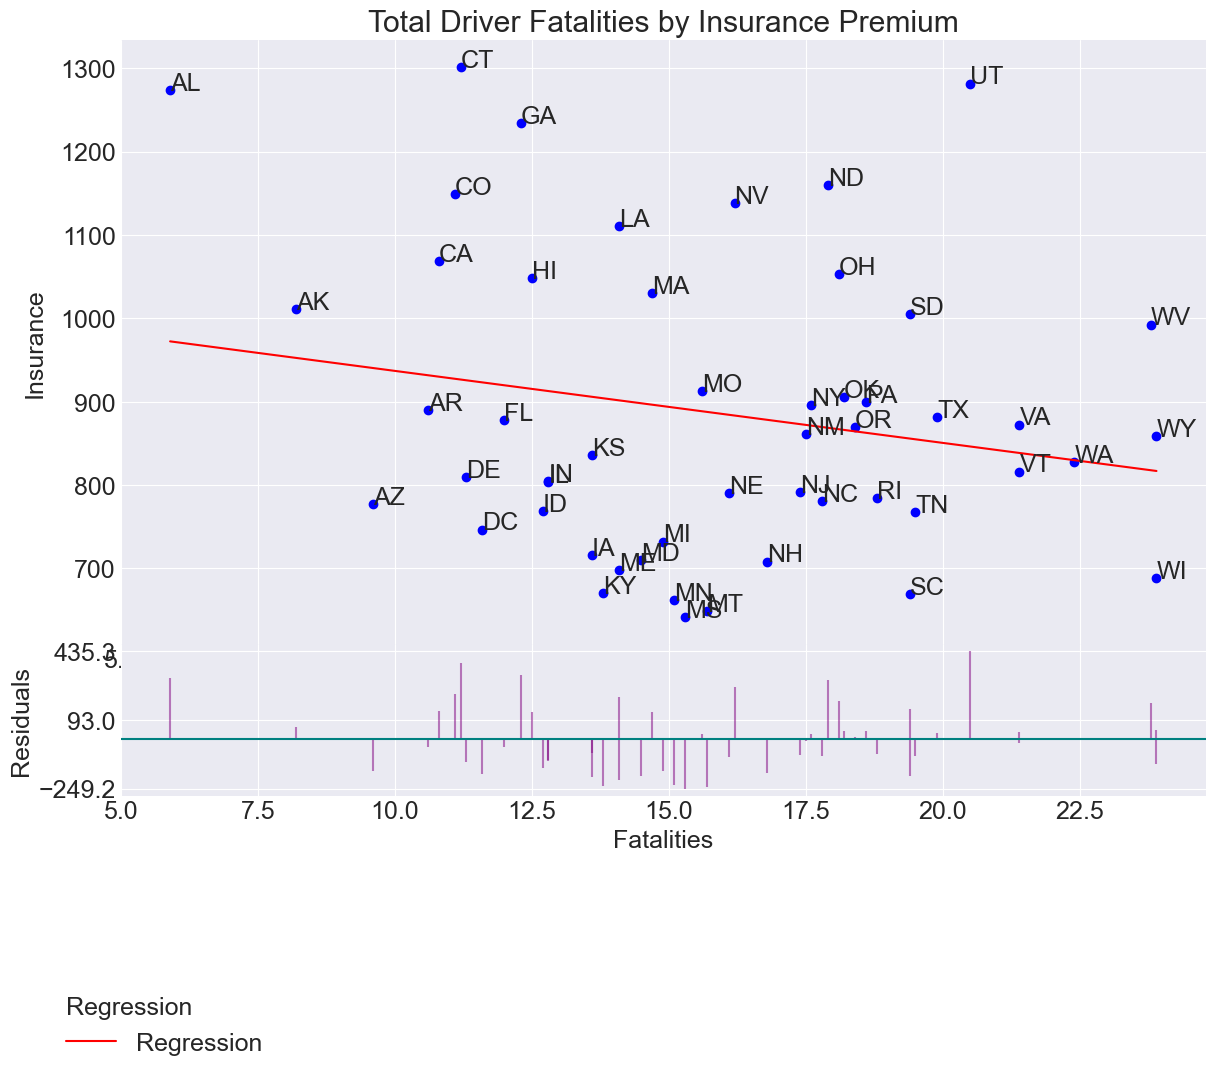

In [4]:
import dataClass
import linear_regression
# Scatter Plot
dataObj = dataClass.Data(dFrame = df)

lr = linear_regression.LinearRegression(dataObj)
lr.linear_regression(['total'], 'ins_premium')

lr.scatter('total', 'ins_premium', title='Total Driver Fatalities by Insurance Premium', operand=lr.lin_opp, R2 = lr.R2, residuals_on = True, annotatePoints = dataObj.select_data(['abbrev']))

## Task 2. Data Transformations

### 2a. Load and plot Happy dataset

1. Use pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe of the Happy dataset located in `data/happy.csv`.
2. Use [to_numpy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html) to convert the DataFrame to a numpy ndarray. Name the ndarray `happy_xy`.
3. Use the provided matplotlib code in the cell below to show a scatter plot of the Happy dataset. It should look like a tall, thin, vertical line centered at `x=2` and `y` ranges from ~0 to ~10.

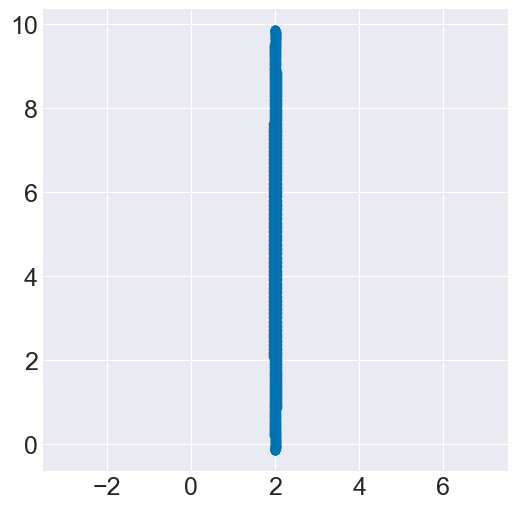

In [5]:
# Your code here
# 1.
happy_df = pd.read_csv('data/happy.csv')
# 2.
happy_xy = happy_df.to_numpy()

# 3. 
# Keep and run the following to plot happy_xy
plt.plot(happy_xy[:,0], happy_xy[:,1], 'o')
plt.gca().axis('equal')
plt.show()

### 2b. Make the dataset happy

In the cell below:

1. Make a [copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) of `happy_xy` and call it `xy`.
2. Your task is to apply the below data transformations to the Happy dataset look like an right-side-up happy face 🙂. Your final happy face when plotted should have the following properties:
   - The face should be centered at the origin. There is no nose in this face, but where the nose *would be* should approximately line up with `(0, 0)`.
   - The extent of the data in `x` and `y` should each be `1`. This means that the final face outline should be a circle (i.e. not stretched out / elongated) and the min/max in both `x` and `y` should be `[-0.5, 0.5]`.
   - The face should look right-side up 🙂.

You should use **each** of the 3 following transformations **once** to get your happy face (*not necessarily in this order!*). **Work with your copy `xy` rather than `happy_xy` so that the original dataset doesn't change!** Otherwise, you will need to load in the data from the CSV file every time before performing your data transformations.

#### Centering

A translation that makes the mean of each data variable `0`:

$$data = data - \vec{\mu}$$

where $data$ is the dataset and $\vec{\mu}$ is a 1D ndarray of length `M` (i.e. number of variables) that contains the mean of each variable the dataset.

#### Min-Max Normalization

A combination of translation and scaling transformations that changes the range of each data variable so that they are all between `0` and `1` (inclusive):

$$data = \frac{data - \vec{mins}}{\vec{maxs} - \vec{mins}}$$

where $data$ is the dataset, $\vec{mins}$ is a 1D ndarray of length `M` that contains the mins of each variable the dataset, and $\vec{maxs}$ is a 1D ndarray of length `M` that contains the mins of each variable the dataset.

#### 2D Rotation

A rotation of 2D data about the origin `(0, 0)`:

```
data = (R2 @ data.T).T
```

where $data$ is the dataset and $R2$ is a 2D ndarray (shape: `(2, 2)`):

$$
R2 = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}$$

where $\theta$ is the angle to rotate the dataset by in **radians**.

#### Reminders

- The `np.sin` and `np.cos` functions assume that you are passing in the angle in **radians**, not degrees. So it might be helpful to use [np.deg2rad](https://numpy.org/doc/stable/reference/generated/numpy.deg2rad.html). 
- You should be computing the means, mins, and maxs *for each variable*. Think about which axis (if any) that the computations should be applied over.

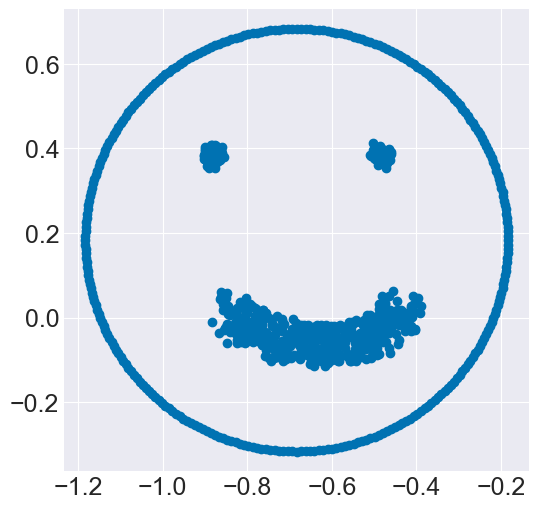

In [6]:
# 1. Make a copy of happy_xy
xy = np.copy(happy_xy)
# 2. Apply the transformations to make the happy face
# Centering
xy = xy - np.mean(xy, axis=0)
# Min-Max Normalization
xy = (xy - np.min(xy, axis=0)) / (np.max(xy, axis=0) - np.min(xy, axis=0))
# 2D Rotation
theta = np.deg2rad(120)
R2 = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
xy = (R2 @ xy.T).T

# Keep and run the following to plot happy_xy
plt.plot(xy[:,0], xy[:,1], 'o')
plt.gca().axis('equal')
plt.show()

## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.